


<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=500 height=300 align=center class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2025<br>
<font color=3C99D size=5>
    Practical Assignment 3 - Answer

    Bayes classifier and Logistic regression
<font color=696880 size=4>
Alireza Malekhosseini


### in this notebook you are going to implement Bayes classifier and Logistic  regression. please note that you are not allowed to use implemented libraries for the implementation of this code.:

In [77]:
# imports
# You can add new libraries if you like
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve


# Generate synthetic data
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


# Metrics

- **Accuracy:** measures the overall correctness of the model by calculating the ratio of correctly predicted instances (True Positives and True Negatives) to the total number of predictions. Accuracy measures the proportion of correctly classified instances out of the total instances.
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
- **precision:** focuses on how many of the predicted positive cases were actually positive, making it useful in scenarios where false positives are costly (e.g., spam detection). This is the formula for precision:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
- **Recall:**, also known as Sensitivity, measures the ability of the model to correctly identify all actual positive cases, which is crucial when missing a positive instance is critical (e.g., medical diagnosis). This is the formalu for calculating recall:
$$
\text{Recall} = \frac{TP}{TP + FN}
$$
- **F1-Score:** is the harmonic mean of precision and recall, providing a balanced measure when there is an imbalance between positive and negative classes, ensuring neither metric dominates the evaluation. This is the formula for calculating f1-score:
$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

complete the functions bellow to calculate the 4 metrics introduced above.

In [81]:
# Metric calculation functions
def accuracy(results):
    total = results['TP'] + results['FP'] + results['TN'] + results['FN']
    return (results['TP'] + results['TN']) / total if total != 0 else 0.0

def precision(results):
    denominator = results['TP'] + results['FP']
    return results['TP'] / denominator if denominator != 0 else 0.0

def recall(results):
    denominator = results['TP'] + results['FN']
    return results['TP'] / denominator if denominator != 0 else 0.0

def f1_score(results):
    p = precision(results)
    r = recall(results)
    return 2 * (p * r) / (p + r) if (p + r) != 0 else 0.0

# Confusion Matrix:

## What is a Confusion Matrix?

A **Confusion Matrix** is a table used to evaluate the performance of a classification model in machine learning. It provides a detailed breakdown of the model's predictions compared to the actual labels. The matrix is particularly useful for understanding the types of errors the model is making.

The confusion matrix consists of four key metrics:
- **True Positive (TP)**: The model correctly predicted the positive class.
- **False Positive (FP)**: The model incorrectly predicted the positive class (Type I error).
- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Negative (FN)**: The model incorrectly predicted the negative class (Type II error).

Here’s a visualization of a confusion matrix:

<!-- |                     | Predicted Negative | Predicted Positive |
|---------------------|--------------------|--------------------|
| **Actual Negative** | TN                 | FP                 |
| **Actual Positive** | FN                 | TP                 | -->

<img src="https://glassboxmedicine.com/wp-content/uploads/2019/02/confusion-matrix.png" alt="Confusion Matrix" width="70%">


## How to Build a Confusion Matrix?

To build a confusion matrix, follow these steps:

1. **Train a Classification Model**:
   - Use a dataset to train a classification model (e.g., logistic regression, decision trees, etc.).

2. **Make Predictions**:
   - Use the trained model to predict labels for a test dataset.

3. **Compare Predictions with Actual Labels**:
   - Compare the predicted labels with the actual labels to determine the number of TP, FP, TN, and FN.

4. **Create the Matrix**:
   - Organize the results into a 2x2 matrix as shown above.



now, complete the cell bellow to make a confusion matrix.


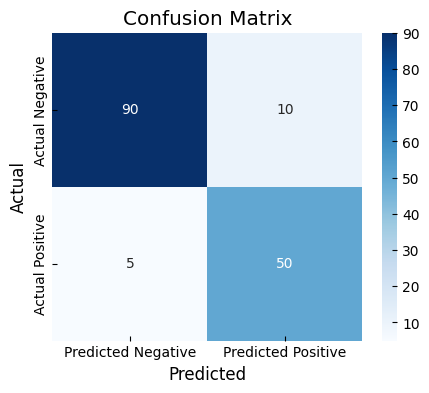

In [78]:
def confusion_matrix(metrics):
    """
    Plots a confusion matrix given the metrics (TP, FP, TN, FN).
    Parameters:    metrics (dict): A dictionary containing the following keys:
                    - 'TP': True Positives
                    - 'FP': False Positives
                    - 'TN': True Negatives
                    - 'FN': False Negatives
    """
    # TODO: Create the confusion matrix as a 2x2 numpy array
    conf_matrix = np.array([
        [metrics['TN'], metrics['FP']],  # First row: TN, FP
        [metrics['FN'], metrics['TP']]   # Second row: FN, TP
    ])

    plt.figure(figsize=(5, 4))  # Set the figure size
    sns.heatmap(
        conf_matrix,            # The confusion matrix data
        annot=True,             # Annotate the cells with the numeric values
        fmt='d',                # Format the annotations as integers
        cmap='Blues',           # Use a blue color map
        xticklabels=['Predicted Negative', 'Predicted Positive'],  # X-axis labels
        yticklabels=['Actual Negative', 'Actual Positive']        # Y-axis labels
    )

    plt.xlabel('Predicted')  # X-axis label
    plt.ylabel('Actual')     # Y-axis label
    plt.title('Confusion Matrix')  # Title of the plot
    plt.grid(False)
    plt.show()

# example confusion matrix
metrics = {
    'TP': 50,  # True Positives
    'FP': 10,  # False Positives
    'TN': 90,  # True Negatives
    'FN': 5    # False Negatives
}

confusion_matrix(metrics)

# Dataset

We are using the Pima Indians diabetes dataset. The objective with this dataset is to create a binary classification model that predicts whether or not an individual has diabetes based on several medical indicators. The target variable is given as Outcome and takes on a value of 1 if the patient has diabetes and 0 otherwise. This is an imbalanced class problem because there are significantly more patients without diabetes than with diabetes.



In [2]:
# Read in data and display first 5 lines
data = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/eecs-491/master/assign/project/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Impute Missing Values
There are several columns that have 0 values which are not physically possible. To correct these values, we can impute the zeros with the median of the column.

In [3]:
data['Glucose'] = data['Glucose'].replace({0: data['Glucose'].median()})
data['BloodPressure'] = data['BloodPressure'].replace({0: data['BloodPressure'].median()})
data['SkinThickness'] = data['SkinThickness'].replace({0: data['SkinThickness'].median()})
data['Insulin'] = data['Insulin'].replace({0: data['Insulin'].median()})
data['BMI'] = data['BMI'].replace({0: data['BMI'].median()})
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Normalize data

In [5]:
def normalize_data(X):
    """Normalize features (columns) to have zero mean and unit variance"""
    X = np.array(X)  # Convert DataFrame to numpy array if needed
    mean = np.mean(X, axis=0, keepdims=True)  # Column means
    std = np.std(X, axis=0, keepdims=True)     # Column standard deviations
    return (X - mean) / (std + 1e-10)

In [6]:
# Extract the features and the labels
features = data.drop(columns='Outcome')
labels = data.Outcome

Pima_X = normalize_data(features)
Pima_y = labels

## Training and Testing Sets
We will be using 200 randomly selected observations for the test set. This leaves 568 observations in the training data from which we will fit our model.

you can use the train_test_split method from sklearn library.

In [9]:
# Split into training and testing set using 200 observations for testing
X_train, X_test, y_train, y_test = train_test_split(Pima_X, Pima_y, test_size=200, random_state = 50)

print(type(X_train))
print(X_train.shape)
print(X_test.shape)

<class 'numpy.ndarray'>
(568, 8)
(200, 8)


## another dataset

The **Breast Cancer Wisconsin (Diagnostic) Dataset** from `sklearn.datasets` is a widely used dataset for binary classification tasks. It contains **569 samples** of breast cancer cases, each described by **30 numerical features** computed from digitized images of fine needle aspirate (FNA) of breast masses. The features include the mean, standard error, and worst (largest) values of 10 cell nucleus characteristics (e.g., radius, texture, perimeter, smoothness). The target variable indicates whether the tumor is **malignant (1) or benign (0)**, with **357 benign and 212 malignant** samples. This dataset is useful for training machine learning models in medical diagnosis.


In [10]:
data = load_breast_cancer()
print(list(data))
Cancer_X, Cancer_y = data.data, data.target


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [18]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Logistic Regression: Theory and Implementation

## 1. Introduction to Logistic Regression
**Logistic Regression** is a fundamental machine learning algorithm used for **binary classification** problems. Unlike **linear regression**, which predicts continuous values, logistic regression estimates the **probability** of an instance belonging to a particular class.

It is widely used in applications such as:
- Medical diagnosis (e.g., detecting cancerous vs. non-cancerous tumors)
- Spam detection (e.g., spam vs. non-spam emails)
- Credit scoring (e.g., loan approval or rejection)

---

## 2. Mathematical Formulation

### 2.1. Hypothesis Function (Sigmoid Function)
Logistic regression uses the **sigmoid function** (also known as the **logistic function**) to map real-valued inputs into a probability range \([0,1]\):

$$
h(z) = \frac{1}{1 + e^{-z}}
$$

where \( z \) is the **linear combination** of input features and weights:

$$
z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = XW + b
$$

- \( X \) is the input feature matrix
- \( W \) is the weight vector (parameters)
- \( b \) is the bias term

The output \( h(z) \) represents the probability that a given instance belongs to the **positive class (1)**.

### 2.2. Decision Boundary
We classify an instance using a **threshold** (e.g., 0.5):

$$
\hat{y} =
\begin{cases}
1, & \text{if } h(z) \geq 0.5 \\
0, & \text{otherwise}
\end{cases}
$$

---

## 3. Cost Function (Log Loss)
To train a logistic regression model, we optimize a **cost function** that measures how well the model fits the data. The **log loss (cross-entropy loss)** is defined as:

$$
J(W, b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log h(z_i) + (1 - y_i) \log (1 - h(z_i)) \right]
$$

where:
- \( m \) is the number of training examples
- \( y_i \) is the actual label (\(0\) or \(1\))
- \( h(z_i) \) is the predicted probability

This function penalizes incorrect predictions:
- If \( y = 1 \) but \( h(z) \) is small, the loss is high.
- If \( y = 0 \) but \( h(z) \) is close to 1, the loss is high.

---

## 4. Regularization (L2 Regularization)
To prevent **overfitting**, we use **L2 regularization** (also called **Ridge Regularization**). This adds a penalty term to the cost function:

$$
J(W, b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log h(z_i) + (1 - y_i) \log (1 - h(z_i)) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} W_j^2
$$

where:
- \lambda controls the strength of regularization.
- Larger \lambda values reduce overfitting but may increase bias.

---

## 5. Gradient Descent for Parameter Optimization
We minimize the cost function using **gradient descent**:

$$
W_j := W_j - \alpha \frac{\partial J}{\partial W_j}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

where \alpha  is the **learning rate** and the gradients are:

$$
\frac{\partial J}{\partial W} = \frac{1}{m} X^T (h - y) + \frac{\lambda}{m} W
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i)
$$



In [79]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, lambda_=0.1):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_ = lambda_  # L2 regularization strength
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.classes_ = ['0', '1']

    def _sigmoid(self, z):
        # Clip values to avoid overflow in exp
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, h):
        # Add epsilon to avoid log(0)
        epsilon = 1e-10
        h = np.clip(h, epsilon, 1 - epsilon)
        loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        regularization = (self.lambda_ / (2 * len(y))) * np.sum(self.weights**2)
        return loss + regularization

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            h = self._sigmoid(linear_model)

            loss = self._compute_loss(y, h)
            self.loss_history.append(loss)

            dw = (1 / n_samples) * np.dot(X.T, (h - y)) + (self.lambda_ / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(h - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, y_true, threshold=0.5):
        proba = self.predict_proba(X)
        print(proba.shape)
        if len(self.classes_) == 2:
            y_pred = (proba >= threshold).astype(int)
        else:
            y_pred = np.argmax(proba, axis=1)

        result = {}
        result['TP'] = np.sum((y_pred == 1) & (y_true == 1))
        result['FP'] = np.sum((y_pred == 1) & (y_true == 0))
        result['TN'] = np.sum((y_pred == 0) & (y_true == 0))
        result['FN'] = np.sum((y_pred == 0) & (y_true == 1))

        return result

    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

(154,)
Accuracy: 0.7402597402597403
Precision: 0.6363636363636364
Recall: 0.6363636363636364
F1 Score: 0.6363636363636364


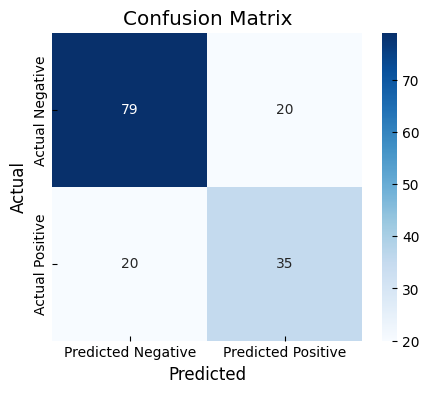

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Normalize data
X = Pima_X
# X = features
y = Pima_y
# Split into train and test sets
X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train LogisticRegressionCV
lr_pima = LogisticRegression()
lr_pima.fit(X_train_pima, y_train_pima)

# Make predictions
result = lr_pima.predict(X_test_pima, y_test_pima)

# Calculate metrics
print("Accuracy:", accuracy(result))
print("Precision:", precision(result))
print("Recall:", recall(result))
print("F1 Score:", f1_score(result))

confusion_matrix(result)

(114,)
Accuracy: 0.9473684210526315
Precision: 1.0
Recall: 0.9154929577464789
F1 Score: 0.9558823529411764


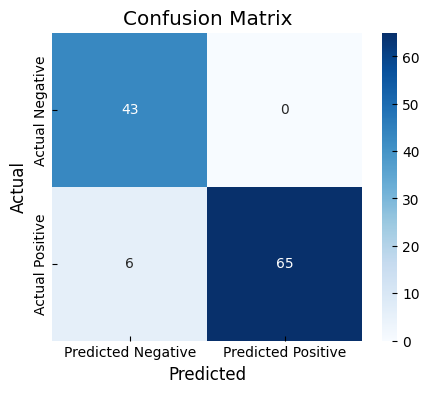

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X_bc, y_bc = data.data, data.target

# Split into train and test sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Initialize and train LogisticRegressionCV
lr_bc = LogisticRegression()
lr_bc.fit(X_train_bc, y_train_bc)

# Make predictions
result = lr_bc.predict(X_test_bc, y_test_bc)

# Calculate metrics
print("Accuracy:", accuracy(result))
print("Precision:", precision(result))
print("Recall:", recall(result))
print("F1 Score:", f1_score(result))

confusion_matrix(result)

## AUC



In [41]:
# Determine the roc curve and the auc and display
def calc_roc(probs, y_test):
  # Calculate the area under the roc curve
  auc = roc_auc_score(y_test, probs)
  # Calculate metrics for the roc curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)

  plt.style.use('bmh')
  plt.figure(figsize = (8, 8))

  # Plot the roc curve
  plt.plot(fpr, tpr, 'b')
  plt.xlabel('False Positive Rate', size = 16)
  plt.ylabel('True Positive Rate', size = 16)
  plt.title('Receiver Operating Characteristic Curve, AUC = %0.4f' % auc,
            size = 18)

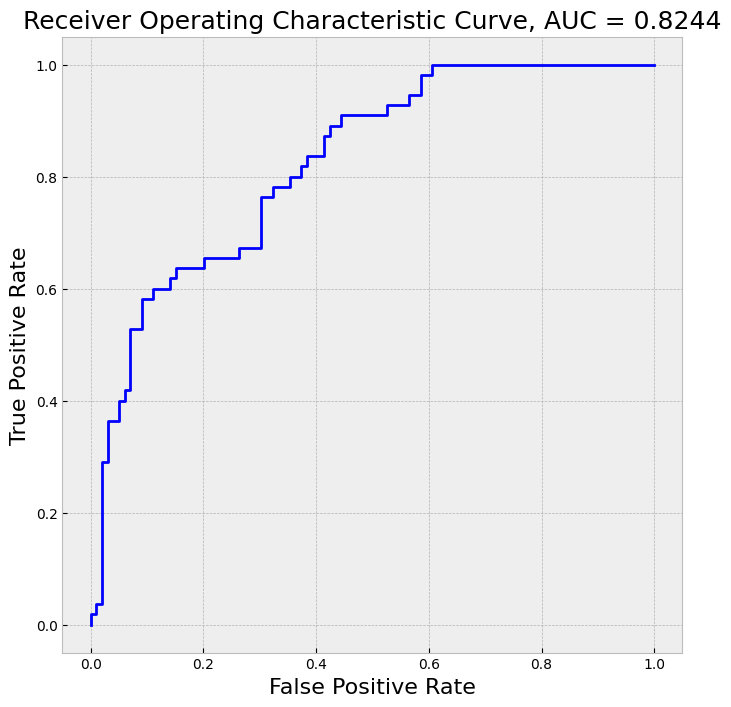

In [58]:
lr_pred_proba = lr_pima.predict_proba(X_test_pima)
calc_roc(lr_pred_proba, y_test_pima)

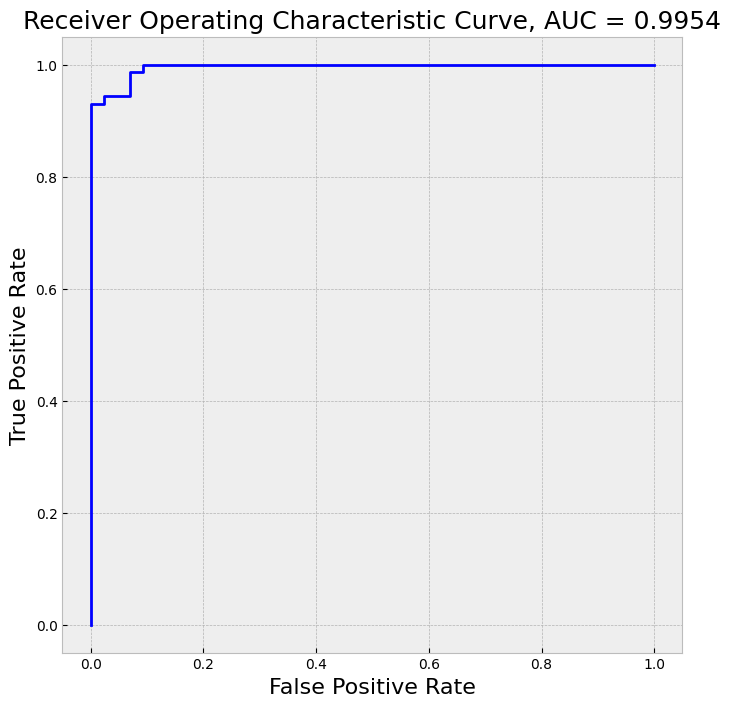

In [47]:
lr_pred_proba = lr_bc.predict_proba(X_test_bc)
calc_roc(lr_pred_proba, y_test_bc)

# Bayesian Classifier: Theory and Implementation

## 1. Introduction to Bayesian Classifier
The Bayesian Classifier is based on **Bayes' Theorem**, which provides a way to calculate the probability of a class given some observed data. This method is highly effective for classification problems, especially when the features are conditionally independent given the class. It assumes that the data follows a **Gaussian (normal) distribution** within each class.

### Bayes' Theorem
Bayes' Theorem is given by:

$$
P(C_k | X) = \frac{P(X | C_k)P(C_k)}{P(X)}
$$

where:
- $P(C_k | X)$ is the posterior probability of class $C_k$ given the feature vector $X$.
- $P(X | C_k)$ is the likelihood, which is the probability of the feature vector $X$ given class $C_k$.
- $P(C_k)$ is the prior probability of class $C_k$.
- $P(X)$ is the evidence, or the total probability of the feature vector across all classes.

In the Bayesian Classifier, we need to calculate the likelihood of the feature vector for each class and multiply it by the prior probability of that class.

### Gaussian Assumption
The likelihood $P(X | C_k)$ is assumed to follow a **Gaussian (Normal) distribution**. This means for each feature $x_i$ in the feature vector $X$, we assume:

$$
P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

where:
- $\mu$ is the mean of feature $x_i$ for class $C_k$,
- $\sigma^2$ is the variance of feature $x_i$ for class $C_k$.

### Prior Probability
The **prior probability** $P(C_k)$ is simply the fraction of samples that belong to class $C_k$. It can be computed as:

$$
P(C_k) = \frac{\text{Number of samples in class } C_k}{\text{Total number of samples}}
$$

## 2. Implementation Overview

In the **`__init__`** method, we initialize parameters for the class:

- **`var_smoothing`**: A small value added to variances to prevent division by zero or extremely small numbers, which can cause instability.
- **`classes_`**: The list of unique classes in the target variable.
- **`priors_`**: The prior probabilities for each class.
- **`means_`**: The means of each feature for each class.
- **`variances_`**: The variances of each feature for each class.



In [51]:
class BayesianClassifier:
    def __init__(self, var_smoothing=1e-9):
        self.var_smoothing = var_smoothing  # To prevent zero variances
        self.classes_ = None
        self.priors_ = None
        self.means_ = None
        self.variances_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_features = X.shape[1]

        # Initialize arrays to store parameters
        self.means_ = np.zeros((n_classes, n_features))
        self.variances_ = np.zeros((n_classes, n_features))
        self.priors_ = np.zeros(n_classes)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.means_[idx, :] = X_c.mean(axis=0)
            self.variances_[idx, :] = X_c.var(axis=0) + self.var_smoothing
            self.priors_[idx] = X_c.shape[0] / X.shape[0]

        return self

    def _calculate_log_proba(self, X):
        log_prob = []
        for idx in range(len(self.classes_)):
            prior = np.log(self.priors_[idx])
            mean = self.means_[idx]
            variance = self.variances_[idx]

            # Gaussian log probability calculation
            log_likelihood = -0.5 * np.sum(
                ((X - mean) ** 2) / variance + np.log(2 * np.pi * variance),
                axis=1
            )
            log_prob.append(prior + log_likelihood)

        return np.array(log_prob).T

    def predict_proba(self, X):
        log_prob = self._calculate_log_proba(X)
        # Softmax to get probabilities
        prob = np.exp(log_prob - np.max(log_prob, axis=1, keepdims=True))
        prob /= prob.sum(axis=1, keepdims=True)
        return prob

    def predict(self, X, y_true, threshold=0.5):
        proba = self.predict_proba(X)
        if len(self.classes_) == 2:
            y_pred = (proba[:, 1] >= threshold).astype(int)
        else:
            y_pred = np.argmax(proba, axis=1)

        # Calculate confusion matrix components
        results = {}
        results['TP'] = np.sum((y_pred == 1) & (y_true == 1))
        results['FP'] = np.sum((y_pred == 1) & (y_true == 0))
        results['TN'] = np.sum((y_pred == 0) & (y_true == 0))
        results['FN'] = np.sum((y_pred == 0) & (y_true == 1))

        return results

    def score(self, X, y):
        results = self.predict(X, y)
        return accuracy(results)

Accuracy: 0.7532467532467533
Precision: 0.6440677966101694
Recall: 0.6909090909090909
F1 Score: 0.6666666666666665


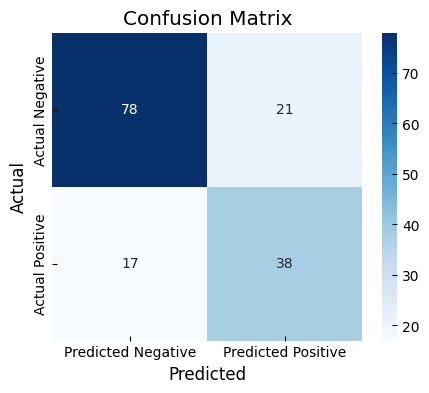

In [88]:
# X = normalize_data(features)
# # X = features
# y = labels
# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bc_pima = BayesianClassifier()
bc_pima.fit(X_train_pima, y_train_pima)

# Get confusion matrix components
results = bc_pima.predict(X_test_pima, y_test_pima)

# Calculate metrics
print("Accuracy:", accuracy(results))
print("Precision:", precision(results))
print("Recall:", recall(results))
print("F1 Score:", f1_score(results))
confusion_matrix(results)

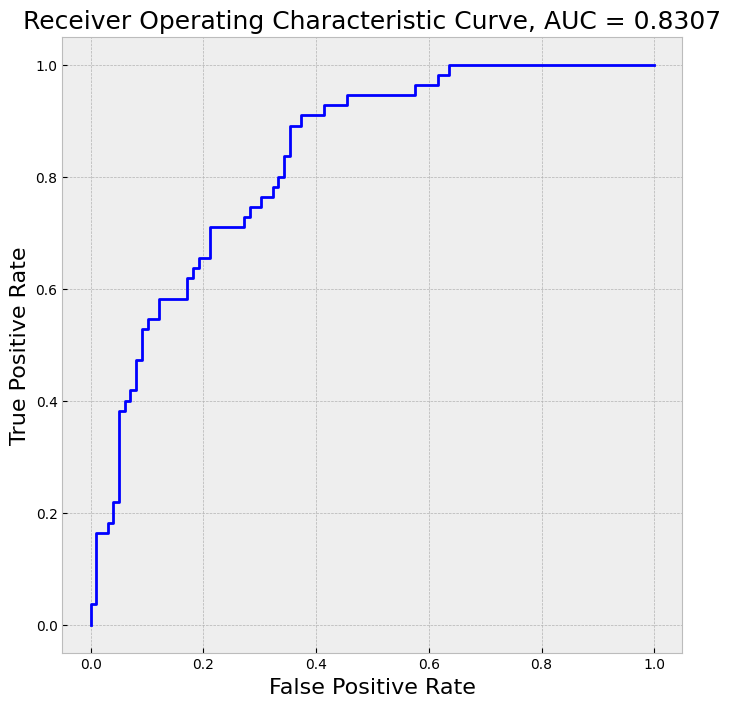

In [64]:
lr_pred_proba = bc_pima.predict_proba(X_test_pima)
calc_roc(lr_pred_proba[:,1], y_test_pima)

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


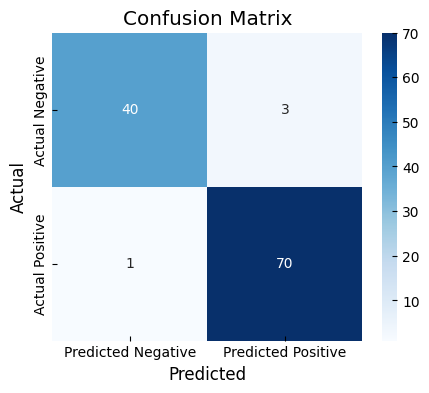

In [89]:
# data = load_breast_cancer()
# X, y = data.data, data.target

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit classifier
bayes_bc = BayesianClassifier()
bayes_bc.fit(X_train_bc, y_train_bc)

# Get confusion matrix components
results = bayes_bc.predict(X_test_bc, y_test_bc)

# Calculate metrics
print("Accuracy:", accuracy(results))
print("Precision:", precision(results))
print("Recall:", recall(results))
print("F1 Score:", f1_score(results))
confusion_matrix(results)

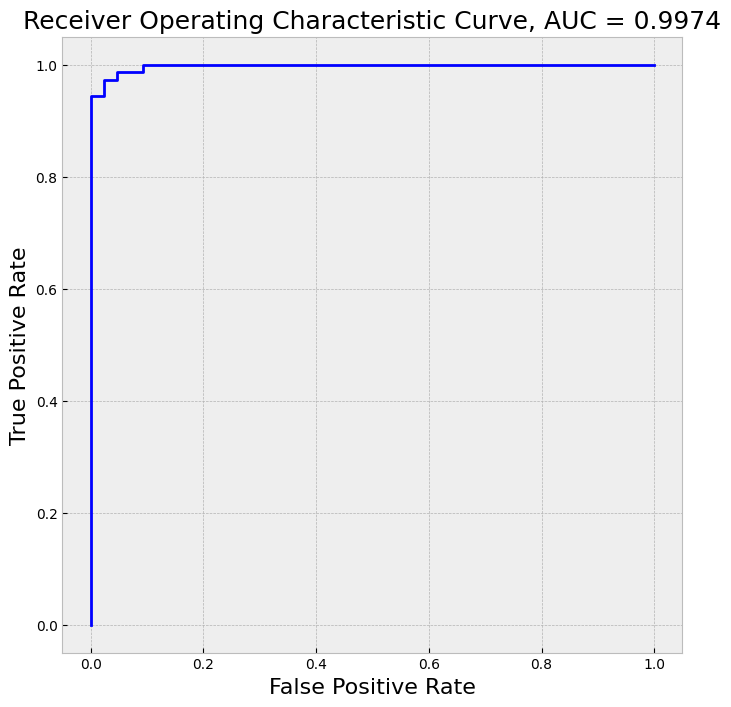

In [90]:
bc_pred_proba = bayes_bc.predict_proba(X_test_bc)
calc_roc(bc_pred_proba[:, 1], y_test_bc)